<div class="alert alert-block alert-info">
<h3>Student Information</h3> Please provide information about yourself. We will NOT grade this submissing w/o all the information<br>
<b>Name</b>: Prachiti Atigre <br>
<b>NetID</b>: pka24 <br>
<b>Recitation (01,02,03)</b>: 02 <br>
<b>Notes to Grader</b> (optional):<br>
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://www.cs.rutgers.edu/academic-integrity/introduction">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b>: PA      


<h3>Grader Notes</h3>
<b>Your Grade<b>:60/60<br>
<b>Grader Initials</b>:YM<br>
<b>Grader Comments</b> (optional):<br>
</div>

## CS 439 - Introduction to Data Science
### Spring 2022

# Lab 3: Exploratary Data Analysis

### Due Date: Thursday March 03, 2022 by 11:59 PM ###

### Instructions
This lab is presented as a notebook. Please execute the cells that are already completed and your task is to fill in the code
between ### BEGIN SOLUTION ### and ### END SOLUTION ###. 

#### Important: Please do not add any new cells or change the order of cells. If you have questions, please contact the courseS staff.

In this lab, you will be working with a dataset from NYPD containing data on calls to the New York Police Department. Information about the datasets can be found at https://opendata.cityofnewyork.us/

## Setup

Note that after activating matplotlib to display figures inline via the IPython magic `%matplotlib inline`, we configure a custom default figure size. Virtually every default aspect of matplotlib [can be customized](https://matplotlib.org/users/customizing.html).

In [1]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 9)

## Part 1:Getting Data

We will work with the NYPD Historic complaint data set. Our first task is to estimate the size of this download by looking at the number of rows, columns and using an estimated size for a column (use a reasonable value). The site metadata is available from the page
https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

In [ ]:
### BEGIN SOLUTION
estimated size of the download (based on metadata information from the site) = 2065278040

# please explain how you reached the answer
# From the website, I took the number of rows and the number of columns and multiplied that. 
# I then multiplied that number by 8 because each object is of 8 bits
### END SOLUTION

### 1.1 Download the data
This file is large (use the estimate you did above). If it takes too long to download, you may want to interrupt and download the file using a browser and URL https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

In [ ]:
import utils
data_dir = 'data'
data_url = 'https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i'

file_name = 'NYPD_Complaint_Data_Historic.csv'

# To retrieve the dataset, we will use the `utils.fetch_and_cache` utility from utils library. 
dest_path = utils.fetch_and_cache(data_url=data_url, file=file_name,data_dir=data_dir)
print(f'Located at {dest_path}')

### 1.2 Inspect the size of the file
It is helpful to get an idea of the size of the file. This can be done using functions in the utils library.

In [ ]:
# look at the size of the file w/o opening it using OS (https://docs.python.org/3/library/os.html). You can perform
# variety of operating system related functions from this package.
### BEGIN SOLUTION
import os
size = os.path.getsize("data/NYPD_Complaint_Data_Historic.csv")
print(size)
#### END SOLUTION

### 1.3 Split the large file
This data file NYPD_Complaint_Data_Historic.csv is too big to load into a single DataFrame. Let us split the large file into smaller files.  Let us find out the number of lines in the NYPD_Complaint_Data_Historic.csv file using utils.

In [ ]:
# Using utils library, find the number of lines in the file
### BEGIN SOLUTION
import utils
print(utils.line_count("data/NYPD_Complaint_Data_Historic.csv"))
### END SOLUTION

In [ ]:
# Split the file into 10 smaller files. Estimate the number of lines in each file using the count above
# files should be created in the data folder and named NYPD_Complaint_Data_Historic_1.csv, 
# NYPD_Complaint_Data_Historic_2.csv, ... NYPD_Complaint_Data_Historic_10.csv etc
# It is possible that few lines from the original file may not be saved due to rounding errors.
### BEGIN SOLUTION
file = open('data/NYPD_Complaint_Data_Historic.csv', 'r').readlines()
filename = "NYPD_Complaint_Data_Historic_"
count = 1

totalNumOfLines = utils.line_count("data/NYPD_Complaint_Data_Historic.csv")
numOfLinesPerFile = totalNumOfLines/10

finalNum = int(np.round(float(numOfLinesPerFile)))

for i in range(len(file)):
    if(count == 11):
        break
    else:
        if i % finalNum == 0:
            open('data/' + str(filename) + str(count) + '.csv', 'w+').writelines(file[i:i+finalNum])
            count = count + 1
            
### END SOLUTION

### 1.4 Check the files in the data folder
Now, we'll use a method of the `Pathlib.Path` class called `glob` to list all files in the `data` directory. You will find useful information in pathlib [docs](https://docs.python.org/3/library/pathlib.html).

Below, we use pathlib's `glob` method to store the list of all files' names from the `data_dir` directory in the variable `file_names`. These names should be strings that contain only the file name (e.g. `dummy.txt` not `data/dummy.txt`). The asterisk (*) character is used with the `glob` method to match any string.

In [2]:
from pathlib import Path
data_dir_path = Path('data') # creates a Path object that points to the data directory
file_names = [x.name for x in data_dir_path.glob('*') if x.is_file()]
file_names

['NYPD_Complaint_Data_Historic_5.csv',
 'NYPD_Complaint_Data_Historic_2.csv',
 'NYPD_Complaint_Data_Historic_6.csv',
 'NYPD_Complaint_Data_Historic_4.csv',
 'NYPD_Complaint_Data_Historic_9.csv',
 'NYPD_Complaint_Data_Historic_3.csv',
 'NYPD_Complaint_Data_Historic_10.csv',
 'NYPD_Complaint_Data_Historic_8.csv',
 'NYPD_Complaint_Data_Historic_1.csv',
 'NYPD_Complaint_Data_Historic_7.csv',
 'NYPD_Complaint_Data_Historic.csv']

### 1.5 Pre-processing of data
It is good to pre-process the data to see if the file can be opened in a Jupyter notebook. We need to avoid large files that can crash notebooks. Typically, files of size around 200 MB is ok to open into a DataFrame. In the following activities we will inspect the file w/o opening it as a DataFrame. Using utils.head 

In [3]:
# Use the util.head() to read up to 5 lines from the original file (w/o opening it)
from utils import head
head('data/NYPD_Complaint_Data_Historic.csv')

['CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX\n',
 '394506329,12/31/2019,17:30:00,,,32,12/31/2019,118,DANGEROUS WEAPONS,793,WEAPONS POSSESSION 3,COMPLETED,FELONY,MANHATTAN,,STREET,N.Y. POLICE DEPT,0,,,,999937,238365,,,,,40.82092679700002,-73.94332421899996,"(40.82092679700002, -73.94332421899996)",PATROL BORO MAN NORTH,,UNKNOWN,UNKNOWN,E\n',
 '968873685,12/29/2019,16:31:00,12/29/2019,16:54:00,47,12/29/2019,113,FORGERY,729,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,BRONX,,STREET,N.Y. POLICE DEPT,0,,,,1022508,261990,,,,,40.885701406000074,-73.86164032499995,"(40.885701406000074, -73.86164032499995)",PATROL BORO BRONX,,UNKNOWN,UNKNOWN,

### 1.6 Inspecting and describing data columns
There should be 35 columns in each record. Using header information and data types, describe the type of data in each
column. If you are unable to determine, just state so.
##### BEGIN SOLUTION
* CMPLNT_NUM : int64
* CMPLNT_FR_DT: object
* CMPLNT_FR_TM: object
* CMPLNT_TO_DT: object
* CMPLNT_TO_TM: object
* ADDR_PCT_CD: float64
* RPT_DT: object
* KY_CD: int64
* OFNS_DESC: object
* PD_CD: float64
* PD_DESC: object
* CRM_ATPT_CPTD_CD: object
* LAW_CAT_CD: object
* BORO_NM: object
* LOC_OF_OCCUR_DESC: object
* PREM_TYP_DESC: object
* JURIS_DESC: object
* JURISDICTION_CODE: float64
* PARKS_NM: object
* HADEVELOPT: object
* HOUSING_PSA: float64
* Y_COORD_CD: float64
* X_COORD_CD: float64
* SUSP_AGE_GROUP: object
* SUSP_RACE: object
* SUSP_SEX: object
* TRANSIT_DISTRICT: float64
* Latitude: float64
* Longitude: float64
* Lat_Lon: object
* PATROL_BORO: object
* STATION_NAME: object
* VIC_AGE_GROUP: object
* VIC_RACE: object
* VIC_SEX: object
##### END SOLUTION

# Part 2 - Exploratory Data Analysis
Exploratory data analysis (EDA) is the process of examining a subest of a large data set to see what we can know about the data. First we will explore one file NYPD_Complaint_Data_Historic_1.csv to see what we can find out.

### 2.1 Time to load dta into a DataFrame
Load the first CSV file, NYPD_Complaint_Data_Historic_1.csv into a `pandas.DataFrame` object. Also do a time analysis to see how long it took to load the data into a DataFrame. Time should be printed in seconds. The time libraries https://docs.python.org/3/library/time.html can help.

In [4]:
### BEGIN SOLUTION
import pandas as pd
import time

timeTaken = time.process_time()
calls = pd.read_csv("data/NYPD_Complaint_Data_Historic_1.csv")
finalTime = time.process_time() - timeTaken
print(finalTime)
### END SOLUTION

2.318864393


### 2.2 Description of Fields
Let's also check some basic information about these files using the `DataFrame.describe` and `DataFrame.info` methods. Describe columns that can be removed based on the information.

In [5]:
### BEGIN SOLUTION
calls.info()
calls.describe()

# What columns can be removed from the DataFrame? A reasonable rule of thumb is that if a column is missing more than 
# 50% of the data then it should be removed
# The columns that can be removed are: PARKS_NM, HADEVELOPT, HOUSING_PSA, TRANSIT_DISTRICT and STATION_NAME
### END SOLUTION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737599 entries, 0 to 737598
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CMPLNT_NUM         737599 non-null  int64  
 1   CMPLNT_FR_DT       737588 non-null  object 
 2   CMPLNT_FR_TM       737599 non-null  object 
 3   CMPLNT_TO_DT       622586 non-null  object 
 4   CMPLNT_TO_TM       622915 non-null  object 
 5   ADDR_PCT_CD        737255 non-null  float64
 6   RPT_DT             737599 non-null  object 
 7   KY_CD              737599 non-null  int64  
 8   OFNS_DESC          736944 non-null  object 
 9   PD_CD              736576 non-null  float64
 10  PD_DESC            736576 non-null  object 
 11  CRM_ATPT_CPTD_CD   737599 non-null  object 
 12  LAW_CAT_CD         737599 non-null  object 
 13  BORO_NM            736561 non-null  object 
 14  LOC_OF_OCCUR_DESC  596884 non-null  object 
 15  PREM_TYP_DESC      733903 non-null  object 
 16  JU

,CMPLNT_NUM,ADDR_PCT_CD,KY_CD,PD_CD,JURISDICTION_CODE,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,TRANSIT_DISTRICT,Latitude,Longitude
count,7.375990e+05,737255.000000,737599.000000,736576.000000,736576.000000,54580.000000,7.352620e+05,7.352620e+05,18509.000000,735262.000000,735262.000000
mean,5.504550e+08,62.789838,302.224423,405.083127,0.867267,7075.273525,1.005061e+06,2.075443e+05,13.315036,40.736295,-73.924880
std,2.598727e+08,34.569016,154.111497,217.784740,7.741181,14503.408657,2.123573e+04,3.130046e+04,12.400196,0.085792,0.076585
min,1.000004e+08,1.000000,101.000000,100.000000,0.000000,197.000000,9.133570e+05,1.211310e+05,1.000000,40.498905,-74.254939
25%,3.253348e+08,40.000000,118.000000,254.000000,0.000000,477.000000,9.917030e+05,1.849382e+05,3.000000,40.674213,-73.973125
50%,5.506587e+08,62.000000,341.000000,349.000000,0.000000,720.000000,1.004445e+06,2.066890e+05,11.000000,40.733927,-73.927136
75%,7.758358e+08,94.000000,351.000000,637.000000,0.000000,1251.000000,1.016635e+06,2.351720e+05,30.000000,40.812144,-73.883064
max,9.999985e+08,123.000000,881.000000,969.000000,97.000000,70679.000000,1.067185e+06,7.250292e+06,34.000000,59.657274,-73.700720


### 2.2 Finding Uniques

Notice that the functions above reveal type information for the columns, as well as some basic statistics about the numerical columns found in the DataFrame. However, we still need more information about what each column represents. Let's explore the data further.

find the number of unique values in each DataFrame column and answer the questions below.

In [ ]:
### BEGIN SOLUTION
calls.nunique()

# Questions
# 1. How many distinct locations where the complaints have come from?
# Ans: 5

# 2. How many age groups are represented in the data set?
# Ans: 44 (VIC_AGE_GROUP)

# 3. How many boroughs are included in the data set?
# Ans: 5

# 4. How many offense types are listed in this data set?
# Ans: 65

### END SOLUTION

### 2.3 Offense by Boro
Using GroupBy operation, create a DataFrame that groups offenses by Boro. call the DataFrame calls_by_Boro_and_offense

In [6]:
### BEGIN SOLUTION
calls_by_Boro_and_offense = calls.groupby('BORO_NM').groups
calls_by_Boro_and_offense
### END SOLUTION

{'BRONX': [1, 3, 8, 14, 15, 17, 19, 20, 26, 30, 32, 35, 37, 41, 43, 45, 46, 48, 49, 50, 58, 60, 62, 64, 65, 68, 69, 72, 75, 78, 80, 82, 83, 86, 90, 91, 92, 96, 99, 101, 102, 103, 104, 105, 106, 109, 110, 116, 119, 120, 123, 124, 126, 127, 128, 133, 134, 135, 143, 145, 151, 154, 159, 160, 164, 165, 167, 172, 173, 175, 176, 177, 178, 180, 181, 182, 183, 186, 187, 190, 191, 193, 194, 195, 198, 202, 204, 210, 212, 213, 217, 219, 225, 226, 231, 232, 235, 237, 239, 240, ...], 'BROOKLYN': [6, 16, 31, 36, 44, 52, 55, 79, 88, 107, 108, 114, 115, 129, 130, 137, 138, 140, 141, 146, 147, 153, 157, 168, 171, 174, 179, 184, 189, 196, 201, 205, 211, 214, 215, 218, 224, 241, 245, 246, 247, 256, 258, 262, 266, 272, 281, 286, 292, 295, 307, 308, 313, 314, 323, 325, 329, 338, 354, 359, 366, 372, 399, 400, 401, 403, 410, 421, 428, 430, 432, 435, 439, 443, 444, 450, 452, 455, 456, 457, 467, 469, 473, 476, 479, 481, 482, 489, 491, 492, 497, 503, 506, 522, 526, 536, 541, 542, 545, 547, ...], 'MANHATTAN': [0,

### 2.4 Offenses in Bronx

In the cell below, find a list of strings corresponding to the possible values for `OFNS_DESC` when `BORO` is "BRONX". Create an expression that automatically extracts the names of the offenses.

In [7]:
### BEGIN SOLUTION
bronx = calls[(calls['BORO_NM'] == 'BRONX')]['OFNS_DESC'].unique()
print(bronx)

### END SOLUTION
# How many offenses were committed in Bronx during the analysis period?
print(len(calls[(calls['BORO_NM'] == 'BRONX')]))

['FORGERY' 'MISCELLANEOUS PENAL LAW' 'OFF. AGNST PUB ORD SENSBLTY &'
 'FELONY ASSAULT' 'ASSAULT 3 & RELATED OFFENSES' 'PETIT LARCENY' 'RAPE'
 'GRAND LARCENY OF MOTOR VEHICLE' 'SEX CRIMES' 'ROBBERY'
 'CRIMINAL MISCHIEF & RELATED OF' 'BURGLARY' 'DANGEROUS DRUGS'
 'DANGEROUS WEAPONS' 'VEHICLE AND TRAFFIC LAWS' 'CRIMINAL TRESPASS'
 'HARRASSMENT 2' 'OFFENSES INVOLVING FRAUD'
 'OFFENSES AGAINST PUBLIC ADMINI' 'ARSON' 'GRAND LARCENY' 'THEFT-FRAUD'
 'FRAUDS' 'ADMINISTRATIVE CODE' 'INTOXICATED & IMPAIRED DRIVING'
 'ESCAPE 3' 'NYS LAWS-UNCLASSIFIED FELONY' 'UNAUTHORIZED USE OF A VEHICLE'
 'THEFT OF SERVICES' 'OFFENSES AGAINST THE PERSON'
 'OTHER OFFENSES RELATED TO THEF' 'ENDAN WELFARE INCOMP'
 'POSSESSION OF STOLEN PROPERTY' 'OTHER STATE LAWS (NON PENAL LA'
 'OFFENSES AGAINST PUBLIC SAFETY' nan 'LOITERING/GAMBLING (CARDS, DIC'
 'ALCOHOLIC BEVERAGE CONTROL LAW' 'KIDNAPPING & RELATED OFFENSES'
 "BURGLAR'S TOOLS" 'CHILD ABANDONMENT/NON SUPPORT' 'GAMBLING'
 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED' 'F

### 2.5 Most Common Crimes in NYC

What are the five crime types of OFNS_DESC that have the most crime events in Bronx? You may need to use `value_counts` to find the answer. Save your results as a list of strings.

**Hint:** *The `keys` method of the Series class might be useful.*

In [8]:
### BEGIN SOLUTION
bronx = calls[(calls['BORO_NM'] == 'BRONX')]['OFNS_DESC'].value_counts().head(5).keys()
bronx
### END SOLUTION

Index(['HARRASSMENT 2', 'PETIT LARCENY', 'ASSAULT 3 & RELATED OFFENSES',
       'CRIMINAL MISCHIEF & RELATED OF', 'DANGEROUS DRUGS'],
      dtype='object')

### 2.6 Probability of a Crime in Bronx
What is the probability that a the crime "Arson" can happen in Bronx?

In [9]:
### BEGIN SOLUTION
totalCrimesInBronx = (calls[(calls['BORO_NM'] == 'BRONX')]).count()['OFNS_DESC']

num = len(calls[(calls['BORO_NM'] == 'BRONX') & (calls['OFNS_DESC'] == 'ARSON')])

probability = num/totalCrimesInBronx
print(probability)

### END SOLUTION

0.002651512793860441


---
# Part 3: Visualizing the Data

## Pandas vs. Seaborn Plotting

Pandas offers basic functionality for plotting. For example, the `DataFrame` and `Series` classes both have a `plot` method. However, the basic plots generated by pandas are not particularly pretty. While it's possible to manually use matplotlib commands to make pandas plots look better, we'll instead use a high level plotting library called Seaborn that will take care of most of this for us.

As you learn to do data visualization, you may find the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) and [Seaborn documentation](https://seaborn.pydata.org/api.html) helpful!

We will continue use EDA for examining a subest of a large data set to see what we can know about the data. Continue to explore one file NYPD_Complaint_Data_Historic_1.csv to see what we can find out.

### 3.1 Plotting a Series
Using the built-in plotting functionality of pandas, such as `plot` method of the `Series` class to generate a `barh` plot type,  display the value counts for `OFNS_DESC` visually as a barh chart.

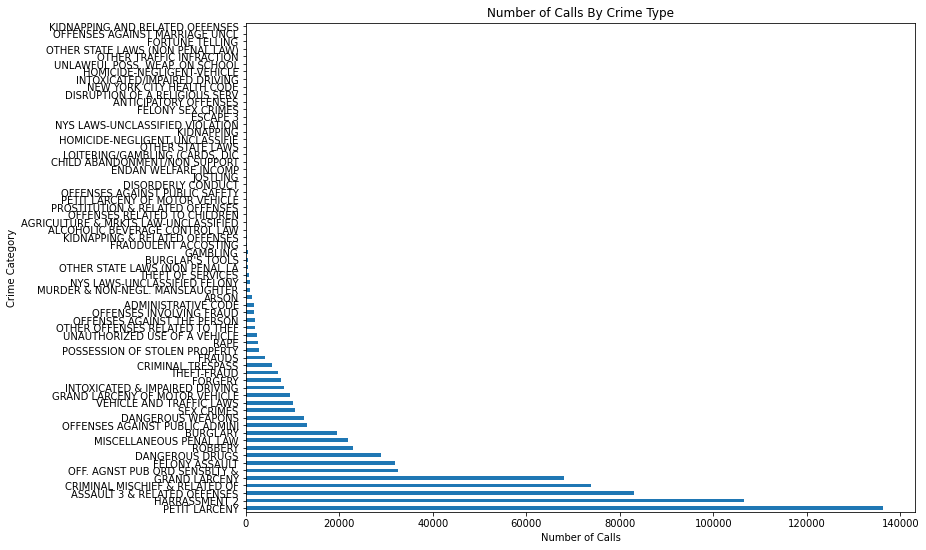

In [10]:
### BEGIN SOLUTION
num = calls['OFNS_DESC'].value_counts()
ax = num.plot.barh()

ax.set_ylabel("Crime Category")
ax.set_xlabel("Number of Calls")
ax.set_title("Number of Calls By Crime Type");
### END SOLUTION

### 3.2 Getting a Better Plot
The plot above can be messy as it plots all offenses. Plot only the offenses that has more than 10000 calls

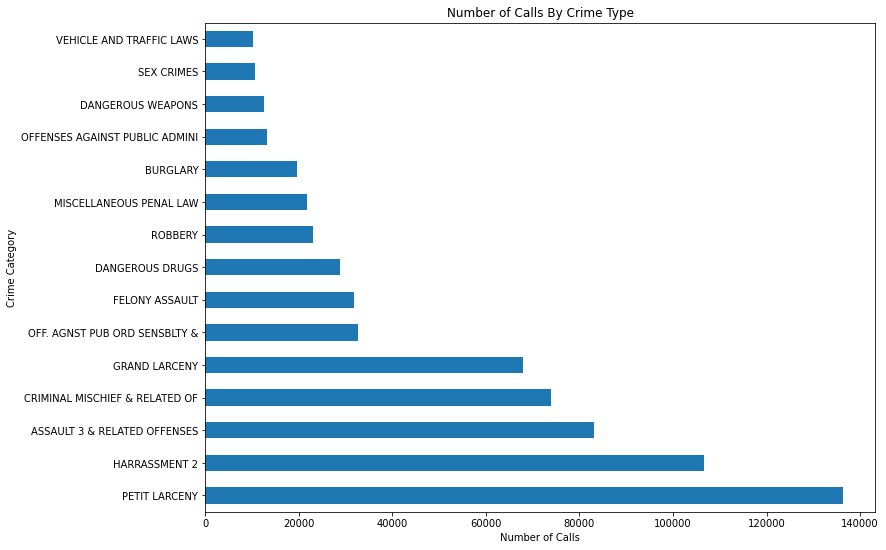

In [11]:
### BEGIN SOLUTION

num = calls['OFNS_DESC'].value_counts()
result = num[(num > 10000)]
ax = result.plot.barh()
ax.set_ylabel("Crime Category")
ax.set_xlabel("Number of Calls")
ax.set_title("Number of Calls By Crime Type");

### END SOLUTION

By contrast, the Seaborn library provides a specific function `countplot` built for plotting counts. It operates directly on the DataFrame itself i.e. there's no need to call `value_counts()` at all. This higher level approach makes it easier to work with. Use the y-label ("Crime Category"), x-label("Number of Calls") and title_of_plot("Number of Calls By Crime Type"

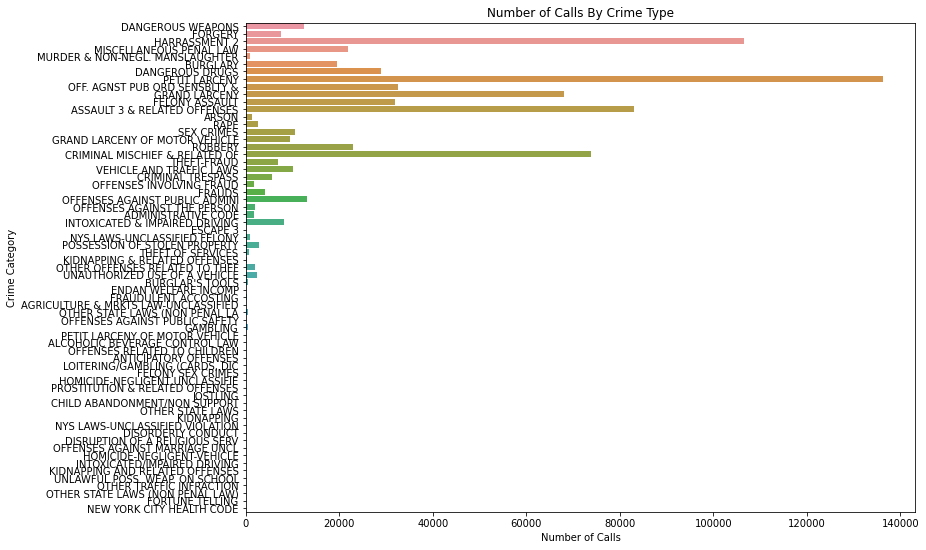

In [12]:
### BEGIN SOLUTION

ax = sns.countplot(y='OFNS_DESC', data=calls)
ax.set_ylabel("Crime Category")
ax.set_xlabel("Number of Calls")
ax.set_title("Number of Calls By Crime Type");

### END SOLUTION

You may note that the ordering might be different for the seaborn plot (as compared to pandas plot). If we want the same ordering that we had in the pandas plot, we can use the order parameter of the `countplot` method. It takes a list of strings corresponding to the axis to be ordered. By passing the index of the `value_counts`, you can get the order you want.

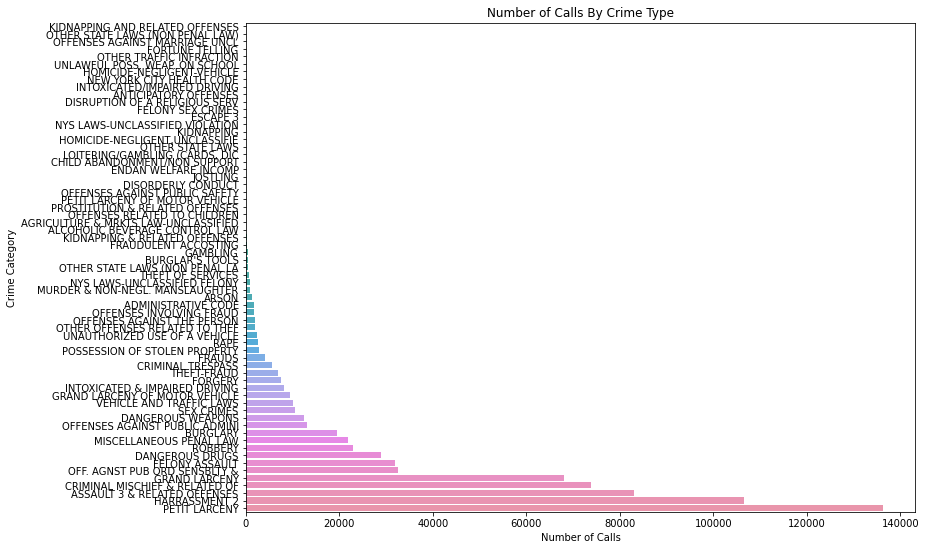

In [13]:
### BEGIN SOLUTION
ax = sns.countplot(y ='OFNS_DESC', data=calls, order = calls['OFNS_DESC'].value_counts(ascending = True).index)

ax.set_ylabel("Crime Category")
ax.set_xlabel("Number of Calls")
ax.set_title("Number of Calls By Crime Type");
### END SOLUTION

Now we have a pretty bar plot with the bars ordered by size. Though `seaborn` appears to provide a superior plot from a aesthetic point of view, the `pandas` plotting library is also good to understand. You'll get practice using both libraries in the following questions.

## An Additional Note on Plotting in Jupyter Notebooks

You may have noticed that many of our code cells involving plotting end with a semicolon (;). This prevents any extra output from the last line of the cell that we may not want to see. Try adding this to your own code in the following questions!

### 3.3 making more plots

Now it is your turn to make some more plots using `pandas` and `seaborn`. Let's start by looking at the distribution of calls over days of the week.

The CMPLNT_FR_DT field contains the date of the event. We would like to add a new column to the DataFrame that includes Day of the week (DAY_OF_WEEK) that indicates the day of the week. This can help us analyze the crimes on a specific day of the week. For example, we can answer questions such as "what day of the week that a LARSON is likely to happen in NYC?"


Add a new column `DAY_OF_WEEK` into the `calls` dataframe that has the day string (eg. 'Sunday') for the corresponding value in CMPLNT_FR_DT. For example, if the first 3 values of `CMPLNT_FR_DT` are `['01/27/2006, '01/28/2006, '01/29/2006]`, then the first 3 values of the `DAY_OF_WEEK` column should be `["Friday", "Saturday", "Sunday"]`.

**Hint:** *Try using the [Series.map](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) function on `calls["OFNS_DESC"]`.  Can you assign this to the new column `calls["DAY_OF_WEEK"]`?*

In [14]:
### BEGIN SOLUTION

days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
calls['CMPLNT_FR_DT'] = pd.to_datetime(calls['CMPLNT_FR_DT'], errors = 'coerce')
calls['DAY_OF_WEEK'] = calls['CMPLNT_FR_DT'].dt.day_name()
calls

### END SOLUTION

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,DAY_OF_WEEK
0,394506329,2019-12-31,17:30:00,NaN,NaN,32.0,12/31/2019,118,DANGEROUS WEAPONS,793.0,...,NaN,40.820927,-73.943324,"(40.82092679700002, -73.94332421899996)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,E,Tuesday
1,968873685,2019-12-29,16:31:00,12/29/2019,16:54:00,47.0,12/29/2019,113,FORGERY,729.0,...,NaN,40.885701,-73.861640,"(40.885701406000074, -73.86164032499995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E,Sunday
2,509837549,2019-12-15,18:45:00,NaN,NaN,109.0,12/29/2019,578,HARRASSMENT 2,638.0,...,NaN,40.742281,-73.819824,"(40.74228115600005, -73.81982408)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE HISPANIC,F,Sunday
3,352454313,2019-12-28,01:00:00,NaN,NaN,47.0,12/28/2019,126,MISCELLANEOUS PENAL LAW,117.0,...,NaN,40.875311,-73.847545,"(40.87531145100007, -73.84754521099995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E,Saturday
4,248803469,2008-09-05,21:41:00,NaN,NaN,NaN,09/05/2008,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,NaN,40.698827,-73.938819,"(40.698827283, -73.938819047)",NaN,NaN,25-44,BLACK,M,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737594,367204669,2014-09-04,20:25:00,09/04/2014,20:25:00,108.0,09/04/2014,348,VEHICLE AND TRAFFIC LAWS,916.0,...,NaN,40.742693,-73.895654,"(40.742693211, -73.895654021)",PATROL BORO QUEENS NORTH,NaN,18-24,WHITE HISPANIC,F,Thursday
737595,576900458,2013-11-01,20:10:00,NaN,NaN,44.0,11/01/2013,105,ROBBERY,397.0,...,NaN,40.835021,-73.912060,"(40.835020524, -73.912060306)",PATROL BORO BRONX,NaN,18-24,BLACK HISPANIC,M,Friday
737596,952771628,2015-12-28,17:38:00,NaN,NaN,104.0,12/28/2015,359,OFFENSES AGAINST PUBLIC ADMINI,750.0,...,NaN,40.704277,-73.891848,"(40.704276778, -73.891847783)",PATROL BORO QUEENS NORTH,NaN,UNKNOWN,UNKNOWN,E,Monday
737597,161192278,2014-11-11,13:20:00,11/11/2014,13:36:00,43.0,11/11/2014,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,NaN,40.825463,-73.870401,"(40.825462558, -73.870401262)",PATROL BORO BRONX,NaN,25-44,BLACK,M,Tuesday


### 3.4 Seaborn plots

Create a `seaborn` plot that shows the number of calls for each day of the week. You may want to use of the `rotation` argument in `ax.set_xticklabels`, which rotates the labels by 90 degrees.

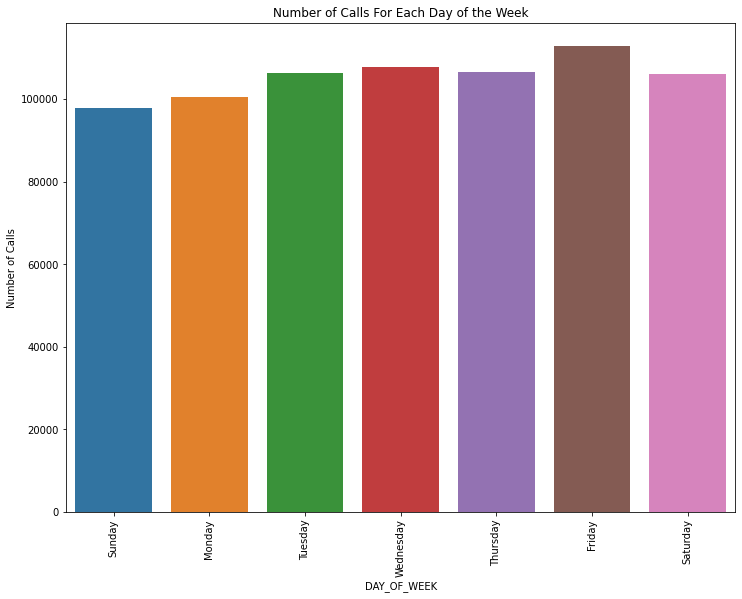

In [15]:
### BEGIN SOLUTION

days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

ax = sns.countplot(x='DAY_OF_WEEK', data=calls, order=days)
ax.set_xticklabels(days, rotation=90)

ax.set_ylabel("Number of Calls")
ax.set_xlabel("DAY_OF_WEEK")
ax.set_title("Number of Calls For Each Day of the Week");

### END SOLUTION

Now, let's make the same plot using `pandas`. Construct a vertical bar plot with the count of the number of calls (entries in the table) for each day of the week **ordered by the day of the week** (eg. `Sunday`, `Monday`, ...). Do not use `sns` for this plot. Be sure that your axes are labeled and that your plot is titled.

**Hint:** *Given a series `s`, and an array `coolIndex` that has the same entries as in `s.index`, `s[coolIndex]` will return a copy of the series in the same order as `coolIndex`.*

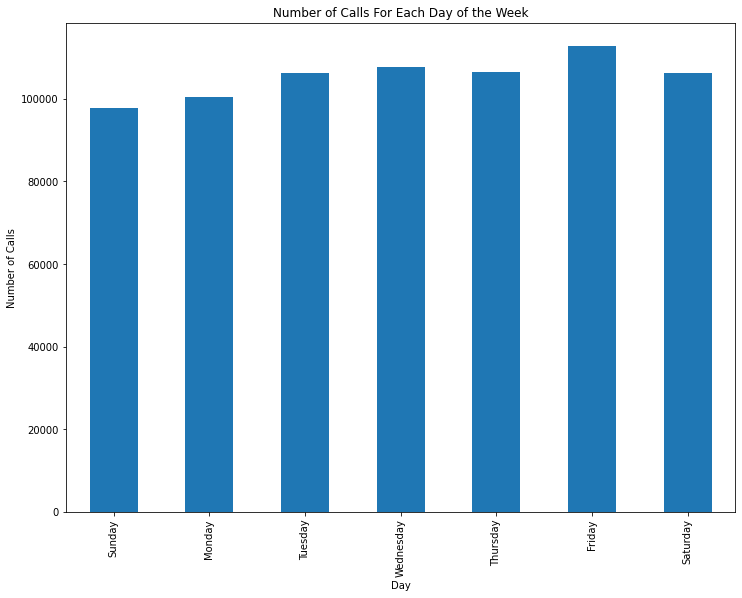

In [16]:
### BEGIN SOLUTION

days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
num = calls['DAY_OF_WEEK'].value_counts().loc[days]
ax = num.plot.bar()
ax.set_xticklabels(days, rotation=90)

ax.set_ylabel("Number of Calls")
ax.set_xlabel("Day")
ax.set_title("Number of Calls For Each Day of the Week");

### END SOLUTION

### 3.5 What Day of the Week is more calls?

Is it true that weekdays generally have slightly more calls than Saturday or Sunday? What can you say about the difference?

##### BEGIN SOLUTION
Yes, from the graph we can see that weekdays generally have slightly more calls than the weekends. Although the number of calls per day is about the same, the calls on weekdays are slightly higher. That is probably because a lot of people commute to the city for work. That increases the amount of people in the city which leads to higher chance of crimes taking place and therefore, the number of calls being higher during the weekdays than the weekends.

##### END SOLUTION

We can break down into some particular types of events to see their distribution. For example, let's make a bar plot for the OFNS_DESC "HARRASSMENT 2". Which day is the peak for "HARRASSMENT 2"?

This time, use `seaborn` to create a vertical bar plot of the number of total noise violations reported on each day of the week, again ordered by the days of the week starting with Sunday. Do not use `pandas` to plot.

**Hint:** *If you're stuck, use the code for the seaborn plot in above question as a starting point.*

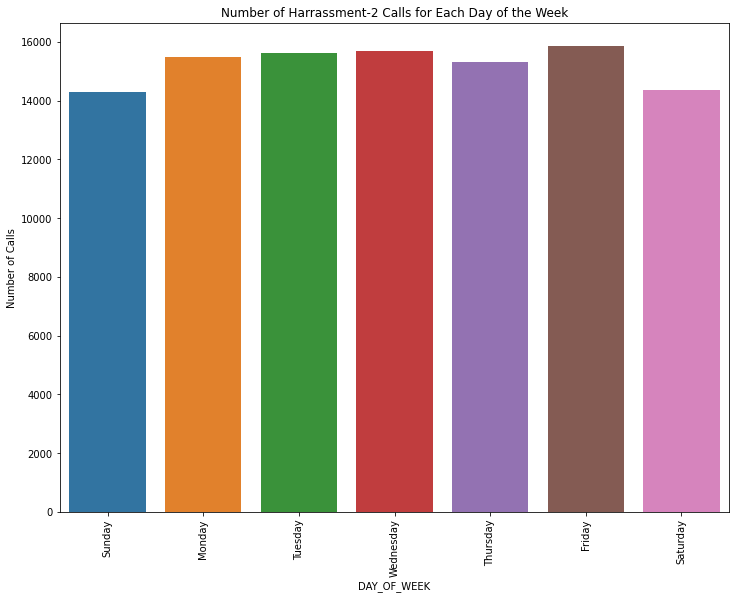

In [17]:
### BEGIN SOLUTION

result = calls[(calls['OFNS_DESC'] == "HARRASSMENT 2")]
ax = sns.countplot(x = 'DAY_OF_WEEK', data=result, order=days)
ax.set_xticklabels(days, rotation=90)

ax.set_ylabel("Number of Calls")
ax.set_xlabel("DAY_OF_WEEK")
ax.set_title("Number of Harrassment-2 Calls for Each Day of the Week");

### END SOLUTION

### 3.6 Distribution

Do you see anything interesting about the distribution of HARRASSMENT 2 calls over a week? Type a short answer below.
##### BEGIN SOLUTION
From the graph, we can conclude that weekdays have slightly more calls than weekends. This is probably because, as said in the last answer, with so many people coming to work in the city, there are more interactions happening. There are various types of harrassments such as workplace harrarresment or possible harrassment during commute, etc.

##### END SOLUTION

### 3.7 More Plots

Let's look at a similar distribution but for a crime we have much more calls data about. In the cell below, create the same plot as you did in previous questions, but now looking at instances of the OFNS_DESC "BURGLARY" (instead of "HARRASSMENT 2"). Use either `pandas` or `seaborn` plotting as you desire.

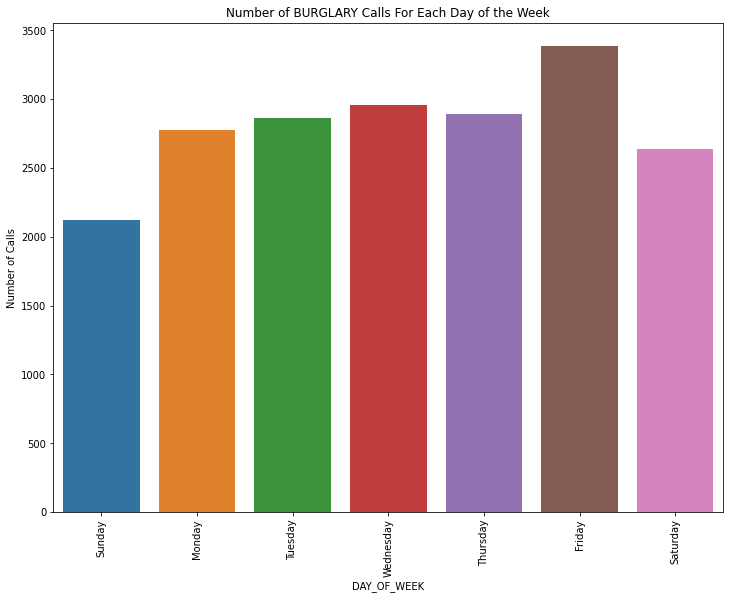

In [18]:
### BEGIN SOLUTION
result = calls[(calls['OFNS_DESC'] == "BURGLARY")]
ax = sns.countplot(x = 'DAY_OF_WEEK', data=result, order=days)
ax.set_xticklabels(days, rotation=90)

ax.set_ylabel("Number of Calls")
ax.set_xlabel("DAY_OF_WEEK")
ax.set_title("Number of BURGLARY Calls For Each Day of the Week");
### END SOLUTION

### 3.8 time of events

Now let's look at the CMPLNT_TO_TM column which indicates the time for events. Since it contains hour and minute information, let's extract the hour info and create a new column named `Hour` in the `calls` dataframe. You should save the hour as an `int`. Then plot the frequency of each hour in the table (i.e., `value_counts()`) sorted by the hour of the day (i.e., `sort_index()`).

You will want to look into how to use:

* [Series.str.slice](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.slice.html#pandas.Series.str.slice) to select the substring.
* [Series.astype](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.astype.html) to change the type.

**Hint:** *The `str` helper member of a series can be used to grab substrings.  For example, `calls["CMPLNT_TO_TM"].str.slice(3,5)` returns the minute of each hour of the `CMPLNT_TO_TM`.*

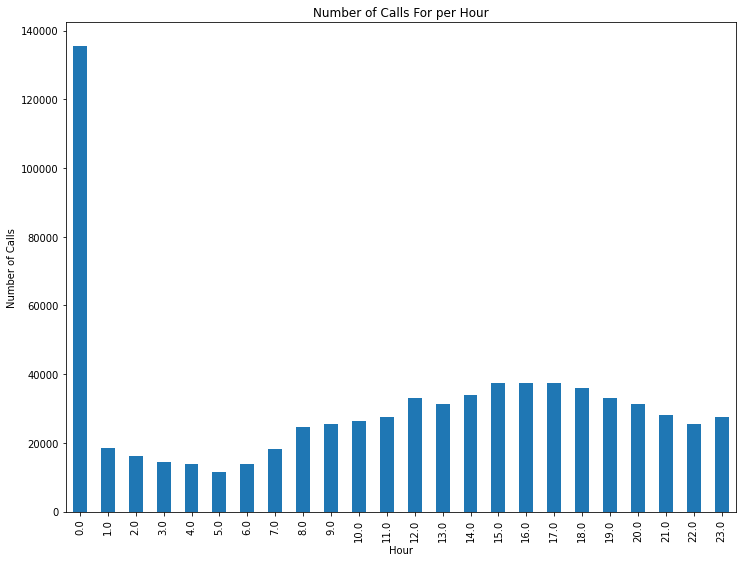

In [19]:
### BEGIN SOLUTION
calls['Hour'] = pd.to_datetime(calls['CMPLNT_TO_TM'], errors = 'coerce').dt.hour
calls['Hour'] = calls['Hour'].replace(np.NaN,0)

num = calls['Hour'].value_counts().sort_index()
ax = num.plot.bar()

ax.set_ylabel("Number of Calls")
ax.set_xlabel("Hour")
ax.set_title("Number of Calls For per Hour");
### END SOLUTION

Create a pandas bar plot showing the number of BURGLARY crimes committed at each hour of the day. Use the labels
* ax.set_xlabel("Hour of the Day")
* ax.set_ylabel("Number of Calls")
* ax.set_title("Number of Calls Reporting Fraud For Each Day of the Week");

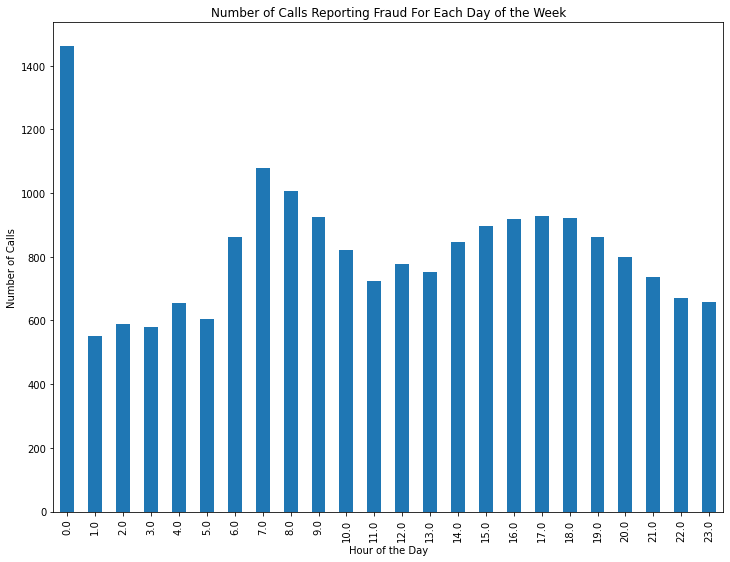

In [20]:
### BEGIN SOLUTION
result = calls[(calls['OFNS_DESC'] == "BURGLARY")]
result = result['Hour'].value_counts().sort_index()
ax = result.plot.bar()

ax.set_xlabel("Hour of the Day")
ax.set_ylabel("Number of Calls")
ax.set_title("Number of Calls Reporting Fraud For Each Day of the Week");
### END SOLUTION

### 3.9 More plots

In the cell below, create a seaborn plot of the same data. Again, make sure you provide axes labels and a title for your plot.

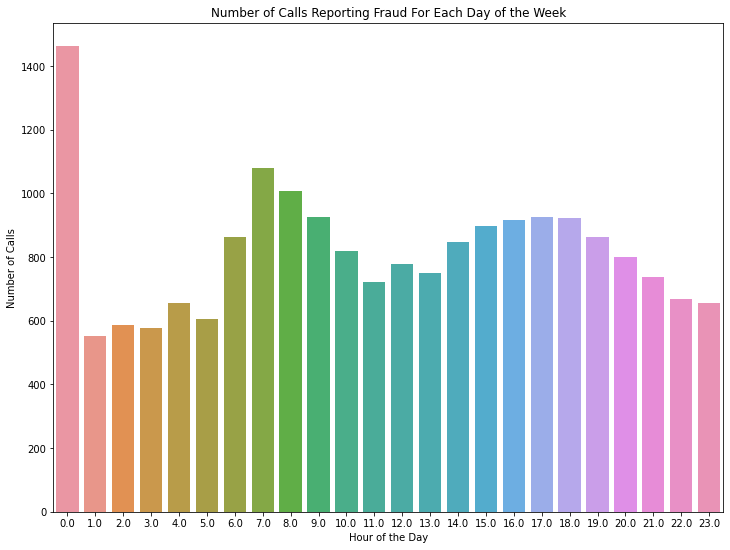

In [21]:
### BEGIN SOLUTION
result = calls[(calls['OFNS_DESC'] == "BURGLARY")]
ax = sns.countplot(x = 'Hour', data=result)

ax.set_xlabel("Hour of the Day")
ax.set_ylabel("Number of Calls")
ax.set_title("Number of Calls Reporting Fraud For Each Day of the Week");
### END SOLUTION

### 3.10 Spike in burglary?

According to your plots, is there a spike in calls reporting BURGLARY at any particular time? If so, Do you trust that this spike is legitimate, or could there be an issue with our data? Explain your reasoning in 1-2 sentences below.

#### BEGIN SOLUTION
Yes, according to the plots, there is a spike in calls reporting BURGLARY at 12am. No I do not trust that the spike is legitimate because before plotting, the data was changed. All the NaN values were changed to 0s. That added extra values to the count of calls at 12am in the original data.

#### END SOLUTION

In the cell below, we generate a boxplot which examines the hour of day of each crime broken down by the `OFNS_DESC` value.  To construct this plot we used the [DataFrame.boxplot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html) documentation.

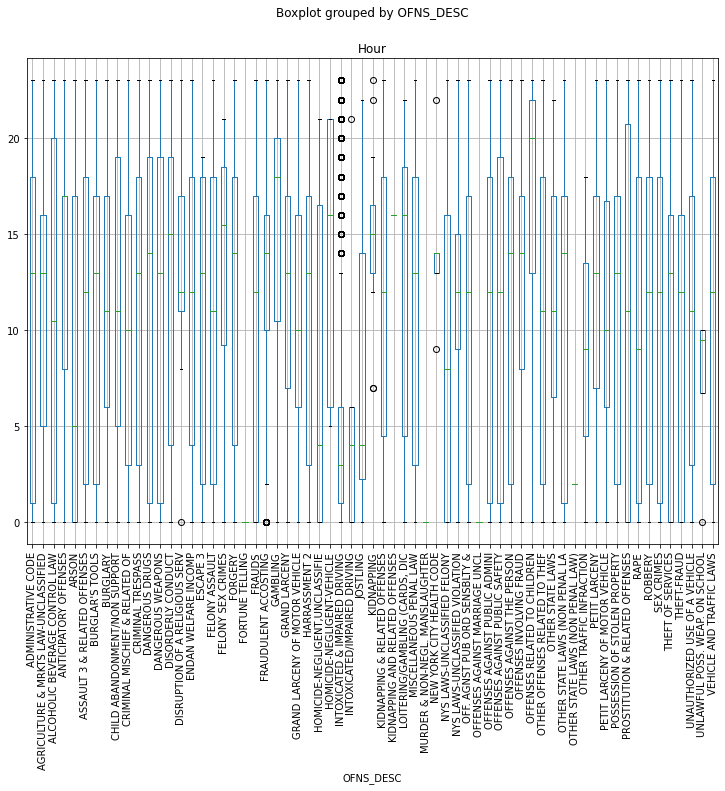

In [22]:
calls.boxplot(column="Hour", by='OFNS_DESC', rot=90);

While the pandas boxplot is informative, we can use seaborn to create a more visually-appealing plot. Using seaborn, regenerate a better box plot. See either the textbook (https://www.textbook.ds100.org/ch/06/viz_quantitative.html) or the [seaborn boxplot documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

Looking at your plot, which crime type appears to have the largest interquartile range? Put your results into `answer` as a string.

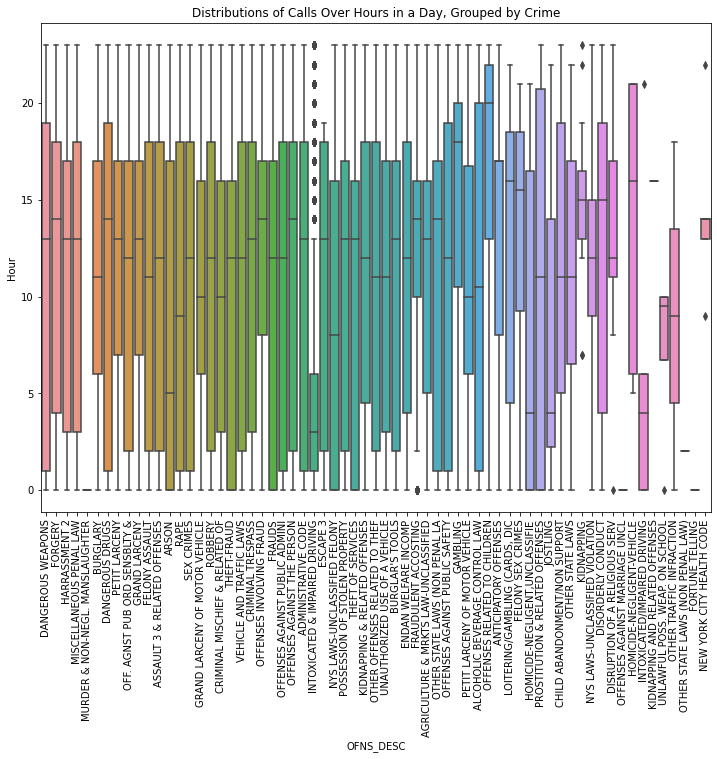

In [23]:
# Todo: Make a boxplot with seaborn
### BEGIN SOLUTION
ax = sns.boxplot(x='OFNS_DESC', y='Hour', data = calls)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("Distributions of Calls Over Hours in a Day, Grouped by Crime");
answer = "Prostitution & Related Offenses"
### END SOLUTION

### 3.11a Explore Suspect and Victim Age Relationships
In this activity we explore relations between SUSP_AGE_GROUP and VIC_AGE_GROUP
1. create a matrix of where rows are SUSP_AGE_GROUPS and Columns are VIC_AGE_GROUPs
2. Fill in the matrix with all probabilities (eg. "the probability that <18 susp_group target <18 victim_group). 

In [24]:
### BEGIN SOLUTION

arr = pd.array(data=["<18","18-24","25-44","45-64","65+"],dtype=str)

grandTotal = 0

a = []
b = []

for i in arr:
    for j in arr:
        grandTotal = grandTotal + len(calls[(calls['SUSP_AGE_GROUP'] == i) & (calls['VIC_AGE_GROUP'] == j)])

for i in arr:
    for j in arr:
        num = len(calls[(calls['SUSP_AGE_GROUP'] == i) & (calls['VIC_AGE_GROUP'] == j)])
        prob = (num/grandTotal)*100
        a.append(prob)
    b.append(a)
    a = []
        
print(pd.DataFrame(b).to_numpy())

### END SOLUTION

[[ 2.88864175  0.67598279  1.74653063  1.031865    0.1479619 ]
 [ 1.57439195  6.53981916  6.54658866  3.23098496  0.53237271]
 [ 2.26536434  6.69986945 32.97906291 10.22581113  1.81180794]
 [ 0.78236062  1.37614235  7.81103428  7.82844156  1.26783038]
 [ 0.08075045  0.1126638   0.62811276  0.80025144  0.41535709]]


### 3.11b Explore Suspect and Victim Sex Relationships
In this activity we explore relations between SUSP_SEX and VIC_SEX 
1. create a matrix of where rows are SUSP_SEX and Columns are VIC_SEX
2. Fill in the matrix with all probabilities (eg. "the probability that Males target other Males?")

In [25]:
### BEGIN SOLUTION
arr = pd.array(data=["M","F"],dtype=str)

grandTotal = 0

a = []
b = []

for i in arr:
    for j in arr:
        grandTotal = grandTotal + len(calls[(calls['SUSP_SEX'] == i) & (calls['VIC_SEX'] == j)])

for i in arr:
    for j in arr:
        num = len(calls[(calls['SUSP_SEX'] == i) & (calls['VIC_SEX'] == j)])
        prob = (num/grandTotal)*100
        a.append(prob)
    b.append(a)
    a = []
        
print(pd.DataFrame(b).to_numpy())

### END SOLUTION

[[31.16957562 43.05673605]
 [ 9.36266661 16.41102172]]


### 3.11c Observations 
Based on what was calculated in 3.11a and 3.11b, state at least important observations.
##### BEGIN SOLUTION
From 3.11a, we can conclude that the probability that suspects in the age group 25-44 will attack in the same age group (i.e, 25-44) is the highest whereas the probability that suspects in the age group 65+ will attack the age group <18 is the lowest.

From 3.11b, we can conclude that the probability of males attacking females is higher than the probability of males attacking males and the probability of females attacking females is higher than females attacking males.

##### END SOLUTION

### 3.12 - Visualization of crimes on a Map of NYC
Finally we attempt to visualize the crimes committed in NYC on a Map. For this activity, use all data, not just the First set,  NYPD_Complaint_Data_Historic_1. 
First we need to install some mapping software. RSun the cell below to install folium package for mapping software.

In [ ]:
!pip install --upgrade folium

In [ ]:
### Plot the maps for BURGLARY in NYC
### if it takes too much time or map does not show up, try plotting a subset of the data set of for a specific crime

### BEGIN SOLUTION
import folium

nyc = calls[(calls['OFNS_DESC'] == "BURGLARY")]

final = nyc[(nyc['Latitude'].notnull()) & (nyc['Longitude'].notnull())]

coords = (final['Latitude'].mean(), final['Longitude'].mean())
ax = folium.Map(location=coords, zoom_start=11)

#did head(20) to only print 20 pins to 
#match the map in the output file provided the professor
for i, lat in final.head(20).iterrows(): 
    sub_coords = (lat['Latitude'], lat['Longitude'])
    ax.add_child(folium.Marker(location=sub_coords, popup=label).add_to(ax))

ax

### END SOLUTION

 ## Congratulations !!!

<div class="alert alert-block alert-info">
<h2>Submission Instructions</h2> 
<b> Output:</b> Please **remove all output** from your notebook prior to submission<br>
<b> File Name:</b> Please name the file as your_section_your_netID_Lab3.ipynb (eg. 01_adg133_Lab3.ipynb<br>
<b> Submit To: </b> Canvas &rarr; Assignments &rarr; Lab3 <br>
<b>Warning:</b> Failure to follow directions may result in loss of points.<br>
</div>

@2022 A.D. Gunawardena. Many people contributed to this lab including TA Liqin Long (now at Google). Much credits go to Josh Hug, and Berkeley Data Science Group for their contributions to the original version. Please DO NOT share this lab and/or post them on public sites.